# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [77]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [78]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 625


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [79]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = url + "&q=" + city
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]
        #city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | korsholm
Processing Record 2 of Set 1 | punta arenas
Processing Record 3 of Set 1 | iqaluit
Processing Record 4 of Set 1 | yellowknife
Processing Record 5 of Set 1 | margaret river
Processing Record 6 of Set 1 | otofuke
Processing Record 7 of Set 1 | olonkinbyen
Processing Record 8 of Set 1 | salinopolis
Processing Record 9 of Set 1 | weno
Processing Record 10 of Set 1 | modimolle
Processing Record 11 of Set 1 | vadso
Processing Record 12 of Set 1 | adamstown
Processing Record 13 of Set 1 | hawaiian paradise park
Processing Record 14 of Set 1 | cuite
Processing Record 15 of Set 1 | blackmans bay
Processing Record 16 of Set 1 | qaqortoq
Processing Record 17 of Set 1 | campoverde
Processing Record 18 of Set 1 | port-aux-francais
Processing Record 19 of Set 1 | villaquilambre
Processing Record 20 of Set 1 | stanley
Processing Record 21 of Set 1 | el calafate
Processing Record 22 of Set 1 | gobabis
P

In [80]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          598
Lat           598
Lng           598
Max Temp      598
Humidity      598
Cloudiness    598
Wind Speed    598
Country       598
Date          598
dtype: int64

In [81]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,korsholm,63.1142,21.6822,61.23,79,0,10.36,FI,1690219975
1,punta arenas,-53.1500,-70.9167,30.88,73,100,6.42,CL,1690219927
2,iqaluit,63.7506,-68.5145,49.73,71,75,11.99,CA,1690219935
3,yellowknife,62.4560,-114.3525,70.32,52,100,6.91,CA,1690220125
4,margaret river,-33.9500,115.0667,61.43,73,7,18.10,AU,1690220125


In [83]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [84]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,korsholm,63.1142,21.6822,61.23,79,0,10.36,FI,1690219975
1,punta arenas,-53.1500,-70.9167,30.88,73,100,6.42,CL,1690219927
2,iqaluit,63.7506,-68.5145,49.73,71,75,11.99,CA,1690219935
3,yellowknife,62.4560,-114.3525,70.32,52,100,6.91,CA,1690220125
4,margaret river,-33.9500,115.0667,61.43,73,7,18.10,AU,1690220125


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

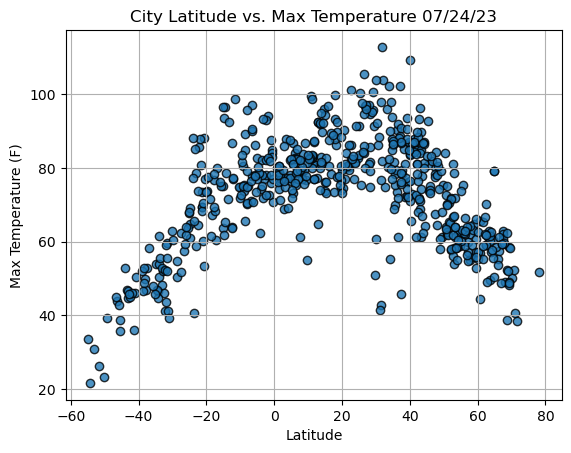

In [85]:
# Build scatter plot for latitude vs. temperature
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

plt.scatter(lats,  # sets x_axis
            max_temps,  # sets y_axis
            edgecolor="black", linewidths=1, marker="o",  # describes line
            alpha=0.8, label="Cities") # more description

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

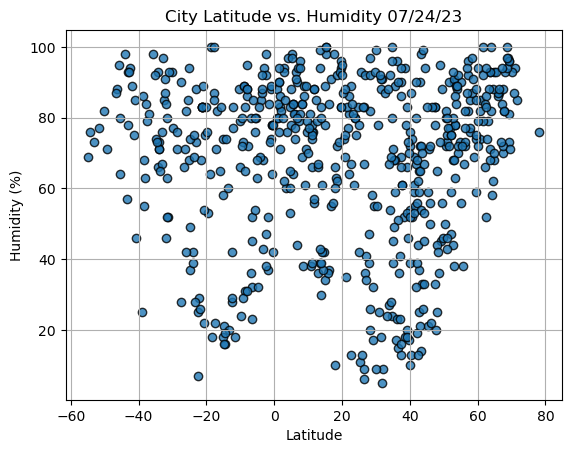

In [87]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(lats,  # sets x_axis
            humidity,  # sets y_axis
            edgecolor="black", linewidths=1, marker="o",  # describes line
            alpha=0.8, label="Cities") # more description

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

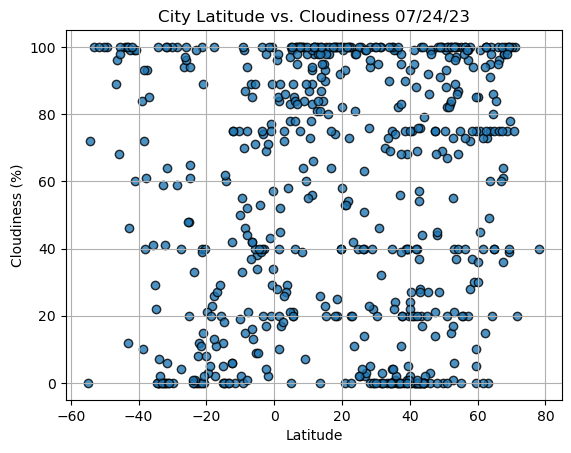

In [89]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(lats,  # sets x_axis
            cloudiness,  # sets y_axis
            edgecolor="black", linewidths=1, marker="o",  # describes line
            alpha=0.8, label="Cities") # more description

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

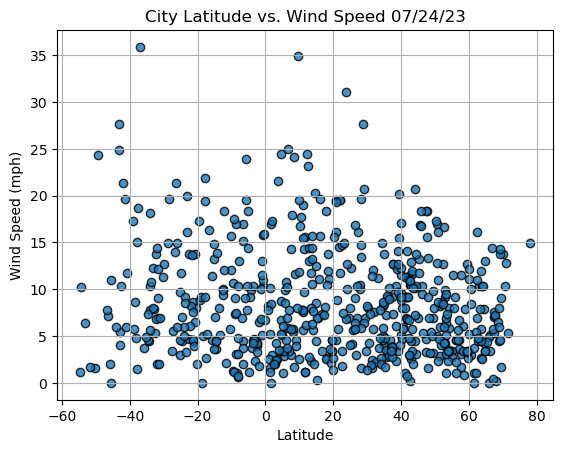

In [91]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(lats,  # sets x_axis
            wind_speed,  # sets y_axis
            edgecolor="black", linewidths=1, marker="o",  # describes line
            alpha=0.8, label="Cities") # more description

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [93]:
# Define a function to create Linear Regression plots
from scipy.stats import linregress


In [94]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
index13=city_data_df.loc[13]
index13

city_data_df["Lat"] >= 0

northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,korsholm,63.1142,21.6822,61.23,79,0,10.36,FI,1690219975
2,iqaluit,63.7506,-68.5145,49.73,71,75,11.99,CA,1690219935
3,yellowknife,62.4560,-114.3525,70.32,52,100,6.91,CA,1690220125
5,otofuke,42.9917,143.2003,68.92,90,76,2.53,JP,1690220126
6,olonkinbyen,70.9221,-8.7187,40.75,94,100,12.82,SJ,1690220126


In [95]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,punta arenas,-53.1500,-70.9167,30.88,73,100,6.42,CL,1690219927
4,margaret river,-33.9500,115.0667,61.43,73,7,18.10,AU,1690220125
7,salinopolis,-0.6136,-47.3561,84.88,64,29,10.38,BR,1690220126
9,modimolle,-24.7000,28.4000,64.69,37,61,4.47,ZA,1690220127
11,adamstown,-25.0660,-130.1015,67.78,68,48,9.66,PN,1690220128


###  Temperature vs. Latitude Linear Regression Plot

The r-squared is: -0.5928793337838812


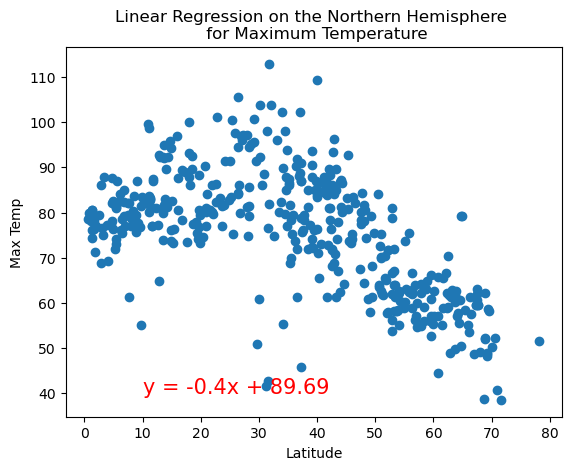

In [98]:
# Linear regression on Northern Hemisphere
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    plt.scatter(x_values,y_values)
    print(f"The r-squared is: {r_value}")
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.title(title)
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values,
                       y_values,
                       'Linear Regression on the Northern Hemisphere \n for Maximum Temperature',
                       'Max Temp',(10,40))



The r-squared is: 0.8419347893336091


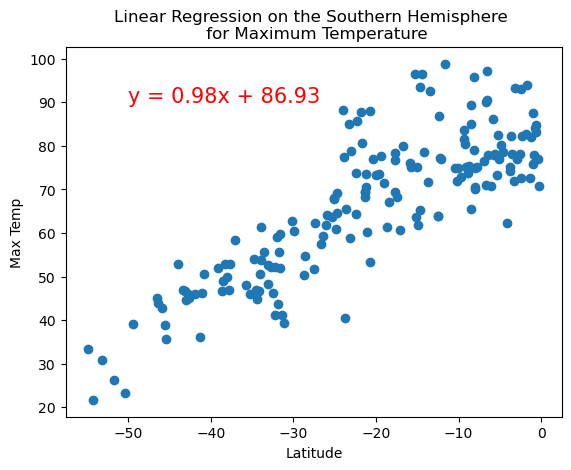

In [99]:
# Linear regression on Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values,
                       y_values,
                       'Linear Regression on the Southern Hemisphere \n for Maximum Temperature',
                       'Max Temp',(-50,90))

**Discussion about the linear relationship:** There is positive correlation between latitude and temperature in northern hemisphere while there is positive correlation in the southern hemisphere.

### Humidity vs. Latitude Linear Regression Plot

The r-squared is: 0.045532909149832324


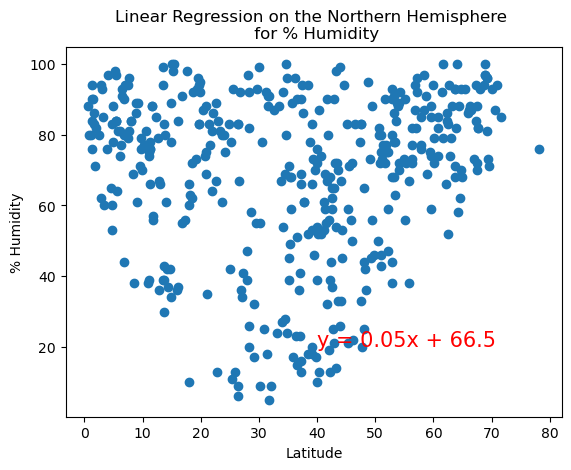

In [100]:
# Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values,
                       y_values,
                       "Linear Regression on the Northern Hemisphere \n for % Humidity",
                       "% Humidity",(40,20))


The r-squared is: -0.17992184229915664


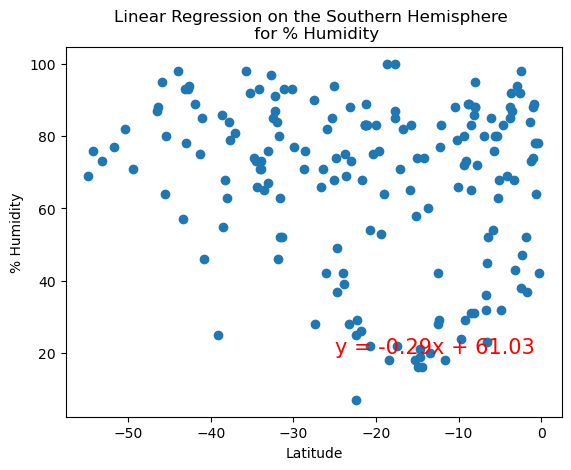

In [101]:
# Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values,
                       y_values,
                       "Linear Regression on the Southern Hemisphere \n for % Humidity",
                       "% Humidity",(-25,20))


**Discussion about the linear relationship:** There is a very weak positive correalation between latitude and humidity in the northern hemisphere where as a very weak negative correlation in the southern hemisphere

### Cloudiness vs. Latitude Linear Regression Plot

The r-squared is: -0.0569657878388428


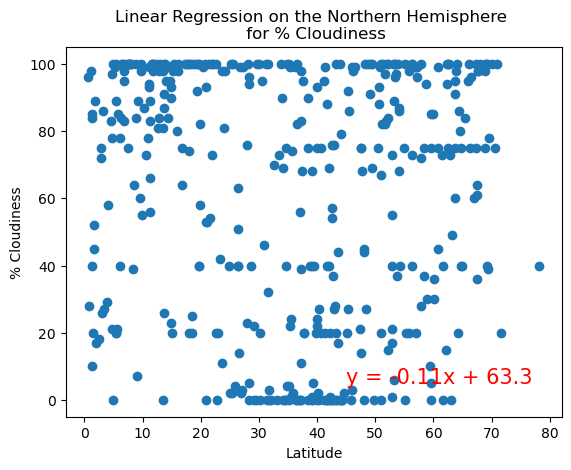

In [102]:
# Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values,
                       y_values,
                       "Linear Regression on the Northern Hemisphere \n for % Cloudiness",
                       "% Cloudiness",(45,5))

The r-squared is: -0.16773415481361864


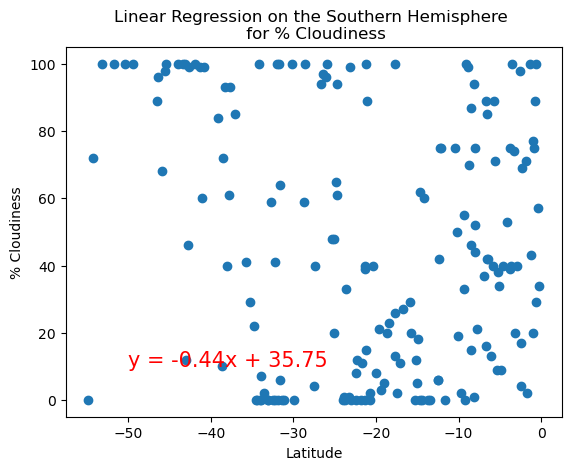

In [103]:
# Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values,
                       y_values,
                       "Linear Regression on the Southern Hemisphere \n for % Cloudiness",
                       "% Cloudiness",(-50,10))


**Discussion about the linear relationship:** Both northern and southern hemisphere show a very weak negative correlation between latitude and cloudiness.

### Wind Speed vs. Latitude Linear Regression Plot

The r-squared is: -0.13974718250756515


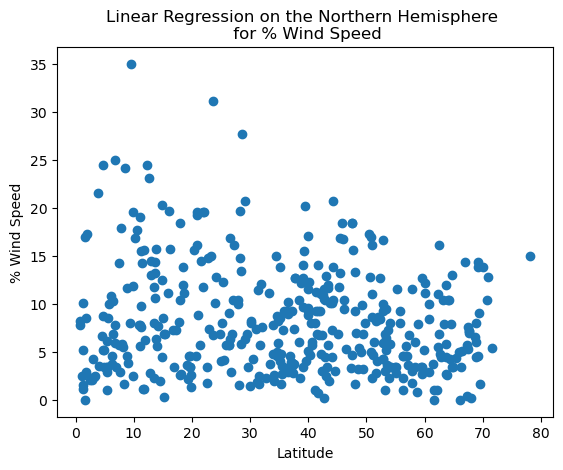

In [104]:
# Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values,
                       y_values,
                       "Linear Regression on the Northern Hemisphere \n for % Wind Speed",
                       "% Wind Speed",(10,40))


The r-squared is: -0.09017848844141528


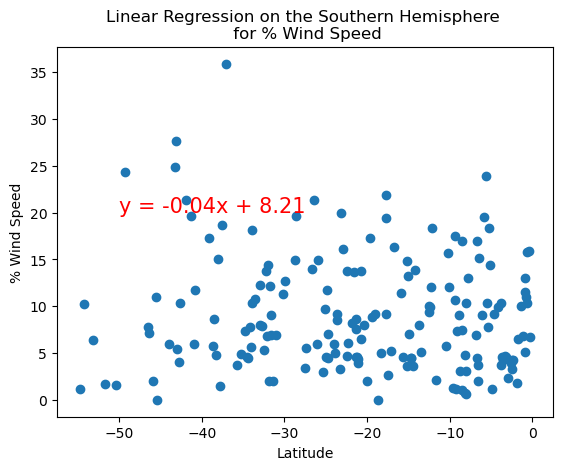

In [105]:
# Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values,
                       y_values,
                       "Linear Regression on the Southern Hemisphere \n for % Wind Speed",
                       "% Wind Speed",(-50,20))


**Discussion about the linear relationship:** Both the northern and the southern hemisphere show a very weak negative correlation between latitude and wind speed